In [2]:
# 데이터 프레임
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 회귀 예측 모델
from statsmodels.api import Logit

# 사이킷런
## 데이터 정제
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## 분류 모델
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
### 분류-TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## 그리드 서치
from sklearn.model_selection import GridSearchCV

## 평가
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 
from subprocess import call

# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

# import & read_csv

In [29]:
df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather.isna().sum()
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

# 날씨 데이터: 평균 온도 및 평균 습도, 강수량

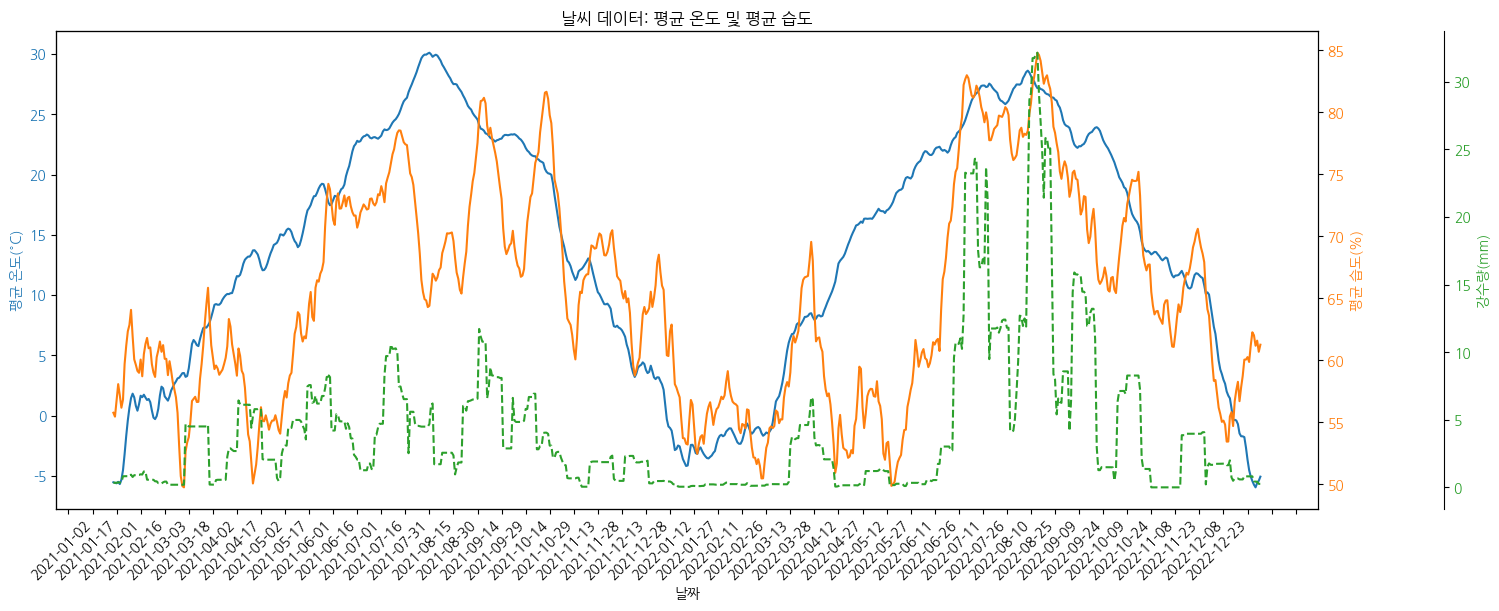

In [53]:
import matplotlib.dates as mdates

weather_data = pd.DataFrame(df_weather)

fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = df_weather['HumidAvg']
humid_date = df_weather['RainfallAmount']

# 이동평균 계산
window = 15
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).mean()
rolling_average_humid = humid_date.rolling(window=window).mean()


# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.plot(weather_data['dateObs'],
         # weather_data['HumidAvg'],
         rolling_average_rainfall.values, color='tab:orange', label='평균 습도')
ax2.set_ylabel('평균 습도(%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.plot(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수량', linestyle='dashed')
ax3.set_ylabel('강수량(mm)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

# 값 표시
# for i, (temp, humid) in enumerate(zip(weather_data['TempAvg'], weather_data['HumidAvg'])):
#     ax1.text(weather_data['dateObs'][i], temp, f'{temp:.1f}°C', ha='center', va='bottom', color='tab:blue')
#     ax2.text(weather_data['dateObs'][i], humid, f'{humid:.1f}%', ha='center', va='bottom', color='tab:orange')

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 평균 습도, 강수량')
plt.show()

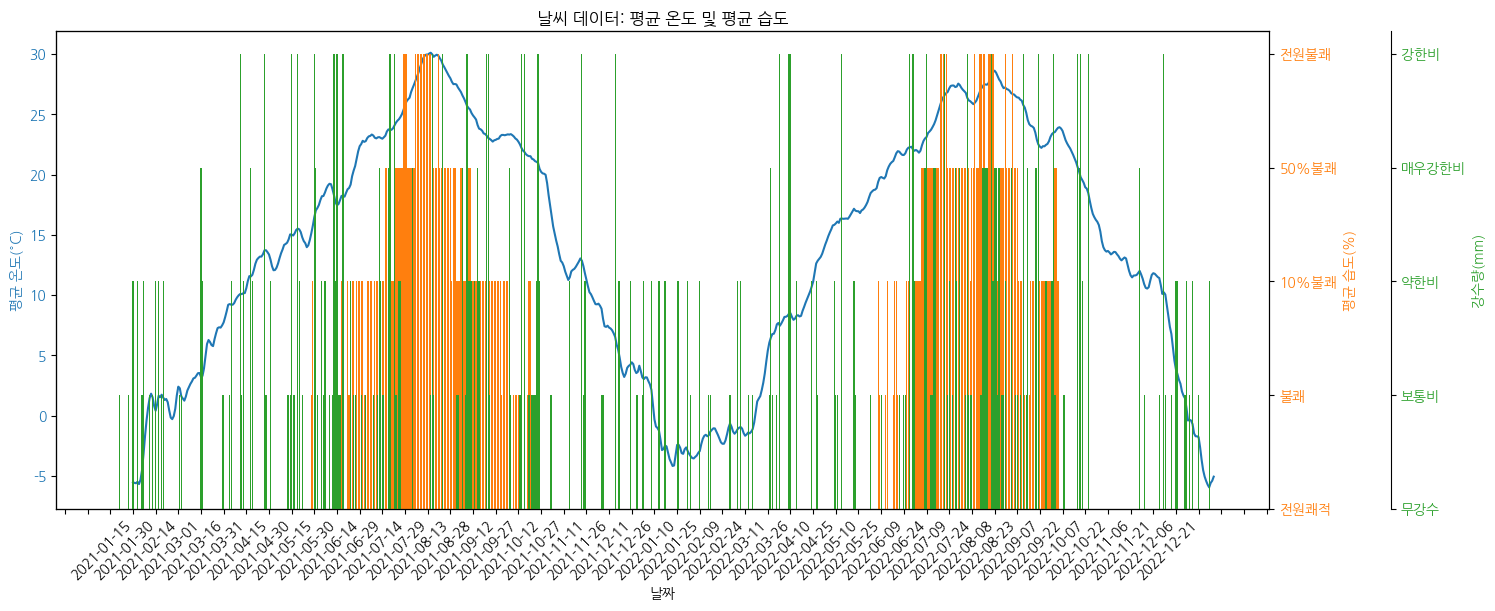

In [54]:
import matplotlib.dates as mdates

weather_data = pd.DataFrame(df_weather)

fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
# rainfall_date = df_weather['discomfortIndex']
# humid_date = df_weather['classRainfall']

# 이동평균 계산
window = 15
rolling_average_temp = temp_date.rolling(window=window).mean()
# rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
# rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])

# # 범주형 변수의 중심값 사용
# rolling_center_discomfort = rainfall_date.rolling(window=window, center=True).apply(lambda x: x.value_counts().idxmax())
# rolling_center_rainfall = humid_date.rolling(window=window, center=True).apply(lambda x: x.value_counts().idxmax())


# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.bar(weather_data['dateObs'],df_weather['discomfortIndex'], color='tab:orange', label='평균 습도')
ax2.set_ylabel('평균 습도(%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.bar(weather_data['dateObs'],df_weather['classRainfall'], color='tab:green', label='강수량', linestyle='dashed')
ax3.set_ylabel('강수량(mm)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

# 값 표시
# for i, (temp, humid) in enumerate(zip(weather_data['TempAvg'], weather_data['HumidAvg'])):
#     ax1.text(weather_data['dateObs'][i], temp, f'{temp:.1f}°C', ha='center', va='bottom', color='tab:blue')
#     ax2.text(weather_data['dateObs'][i], humid, f'{humid:.1f}%', ha='center', va='bottom', color='tab:orange')

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 평균 습도, 강수량')
plt.show()

# 날씨 데이터: 평균 온도 및 불쾌지수, 강수척도

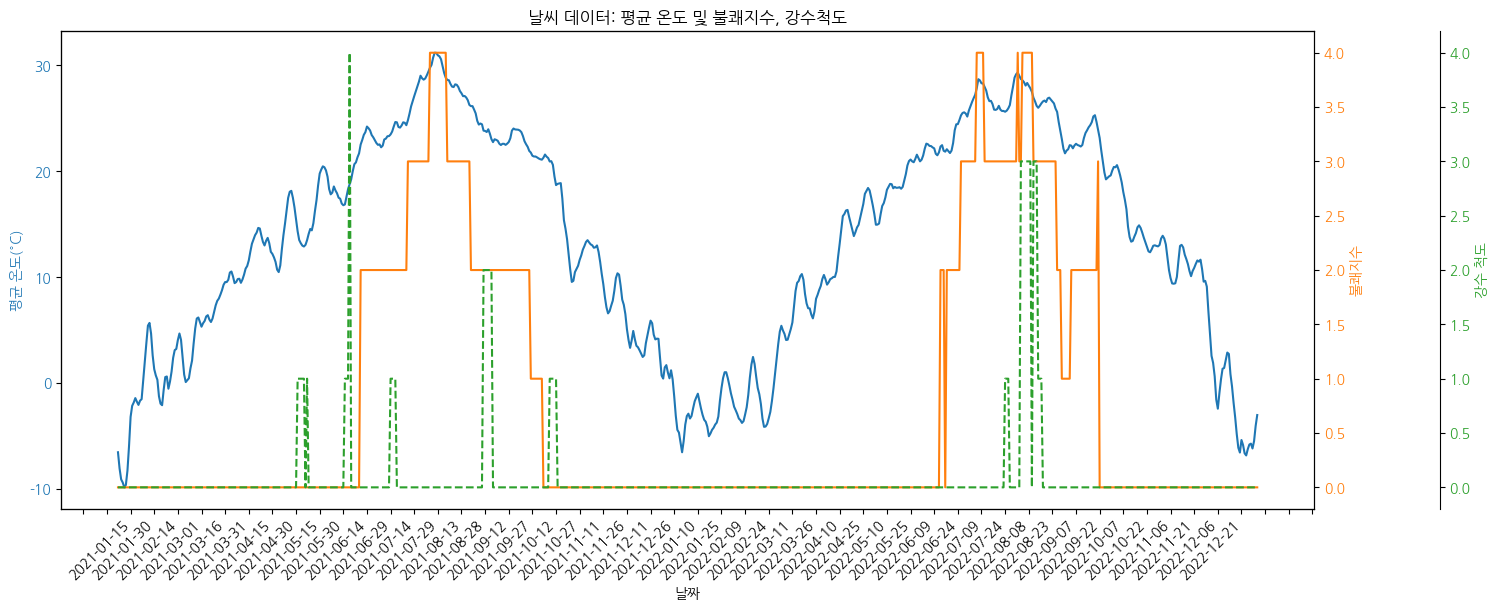

In [56]:
import matplotlib.dates as mdates
from sklearn.preprocessing import OrdinalEncoder

weather_data = pd.DataFrame(df_weather)

weather_data.replace({'discomfortIndex' : { '전원쾌적' : 0 , '불쾌' : 1 ,  '10%불쾌' : 2 ,  '50%불쾌' : 3  ,  '전원불쾌' :4  },
                        'classRainfall' : {  '무강수':0 , '보통비':1 , '약한비': 2, '매우강한비': 3, '강한비':  4 }},  inplace=True)
    
fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = weather_data['discomfortIndex']
humid_date = weather_data['classRainfall']

# 이동평균 계산
window = 7
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])
# # 범주형 변수의 중심값 사용

# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.plot(weather_data['dateObs'],
         # weather_data['HumidAvg'],
         rolling_average_rainfall.values, color='tab:orange', label='불쾌지수')
ax2.set_ylabel('불쾌지수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# ax2.yaxis.set_major_formatter(mticker.FuncFormatter(format_percent))

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.plot(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수 척도', linestyle='dashed')
ax3.set_ylabel('강수 척도', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 불쾌지수, 강수척도')
plt.show()

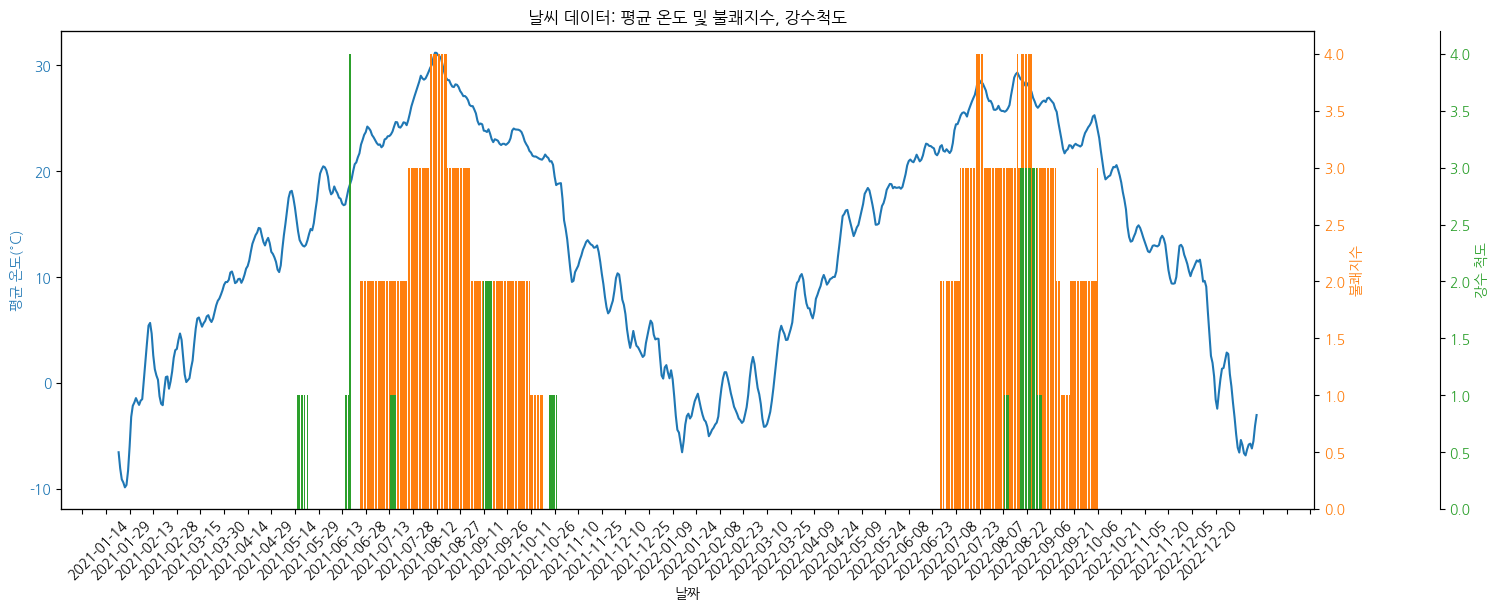

In [58]:
import matplotlib.dates as mdates
from sklearn.preprocessing import OrdinalEncoder

weather_data = pd.DataFrame(df_weather)

weather_data.replace({'discomfortIndex' : { '전원쾌적' : 0 , '불쾌' : 1 ,  '10%불쾌' : 2 ,  '50%불쾌' : 3  ,  '전원불쾌' :4  },
                        'classRainfall' : {  '무강수':0 , '보통비':1 , '약한비': 2, '매우강한비': 3, '강한비':  4 }},  inplace=True)
    
fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = weather_data['discomfortIndex']
humid_date = weather_data['classRainfall']

# 이동평균 계산
window = 7
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])
# # 범주형 변수의 중심값 사용

# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.bar(weather_data['dateObs'],rolling_average_rainfall.values, color='tab:orange', label='평균 습도')

# ax2.plot(weather_data['dateObs'],
#          # weather_data['HumidAvg'],
#          rolling_average_rainfall.values, color='tab:orange', label='불쾌지수')
ax2.set_ylabel('불쾌지수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# ax2.yaxis.set_major_formatter(mticker.FuncFormatter(format_percent))

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.bar(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수 척도', linestyle='dashed')
ax3.set_ylabel('강수 척도', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 불쾌지수, 강수척도')
plt.show()

# 날씨 데이터: 불쾌지수, 강수척도별 매출 비교

In [90]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')

In [102]:
df_sales_weather

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,...,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,Cost,Grade,TempAvg,classRainfall,discomfortIndex
0,U101066,10337,2021-05-31,2021,5,31,0,05:19:59,남성,10대,...,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,3436000,실버,19.9,보통비,전원쾌적
1,U101094,10248,2021-05-31,2021,5,31,0,18:19:36,남성,10대,...,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,2875310,실버,19.9,보통비,전원쾌적
2,U101077,10244,2021-05-31,2021,5,31,0,03:47:12,남성,30대,...,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,3573800,실버,19.9,보통비,전원쾌적
3,U101084,10233,2021-05-31,2021,5,31,0,08:05:19,남성,30대,...,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,3004400,실버,19.9,보통비,전원쾌적
4,U101054,10131,2021-05-31,2021,5,31,0,02:06:37,여성,40대,...,간편식사,M2,샌드위치,샌)더블에그파니니,4000,2289900,실버,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,10035,2022-02-27,2022,2,27,6,07:06:40,남성,40대,...,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,2037570,실버,3.7,무강수,전원쾌적
509296,U100989,10039,2022-02-27,2022,2,27,6,21:03:30,남성,60대이상,...,음료,M2,아이스,22del)스윗아메리카노230,900,2173690,실버,3.7,무강수,전원쾌적
509297,U100977,10115,2022-02-27,2022,2,27,6,22:08:15,남성,20대,...,음료,M1,음료,코카)크래프트아메P470ml,2500,2248060,실버,3.7,무강수,전원쾌적
509298,U101098,10023,2022-02-27,2022,2,27,6,04:55:10,남성,30대,...,음료,M1,음료,코카)조지아맥스캔,1200,2035190,실버,3.7,무강수,전원쾌적


In [115]:
grouped_sales

classRainfall  discomfortIndex
강한비            10%불쾌               14838950
               50%불쾌                7936880
               불쾌                  11493600
               전원불쾌                 4751200
               전원쾌적                46150060
매우강한비          10%불쾌               20893160
               50%불쾌               27200760
               불쾌                   2707650
               전원불쾌                 2884840
               전원쾌적                14073170
무강수            10%불쾌              143142520
               50%불쾌              103462790
               불쾌                  35045460
               전원불쾌                58584480
               전원쾌적               748367470
보통비            10%불쾌               34043500
               50%불쾌               36542640
               불쾌                  19335600
               전원불쾌                 4046860
               전원쾌적               128938950
약한비            10%불쾌               13640580
               50%불쾌               14035470
 

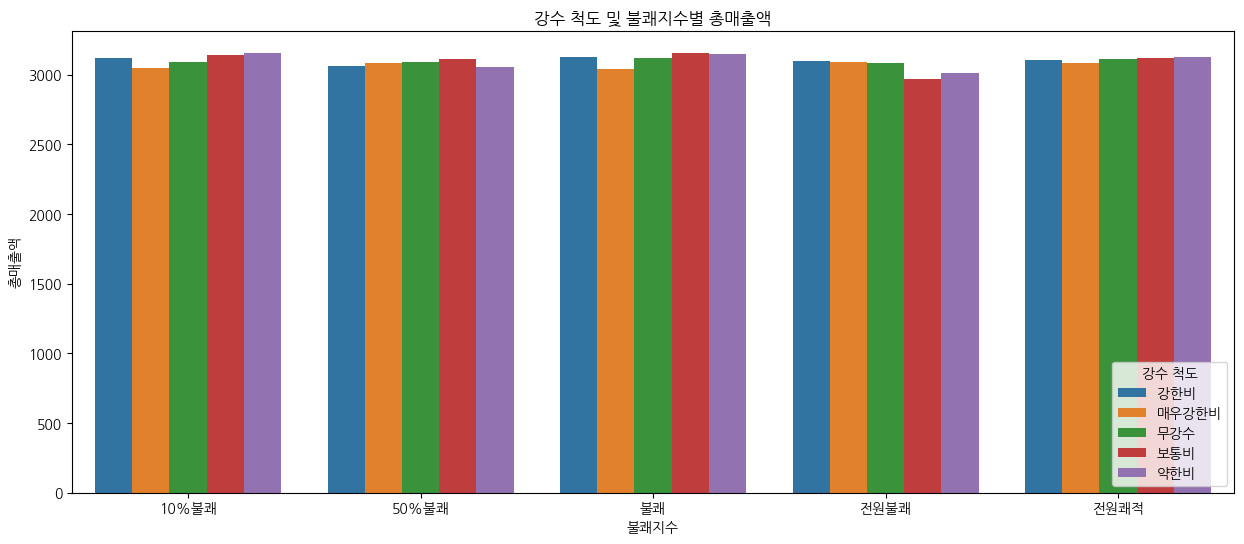

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].mean()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('총매출액')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

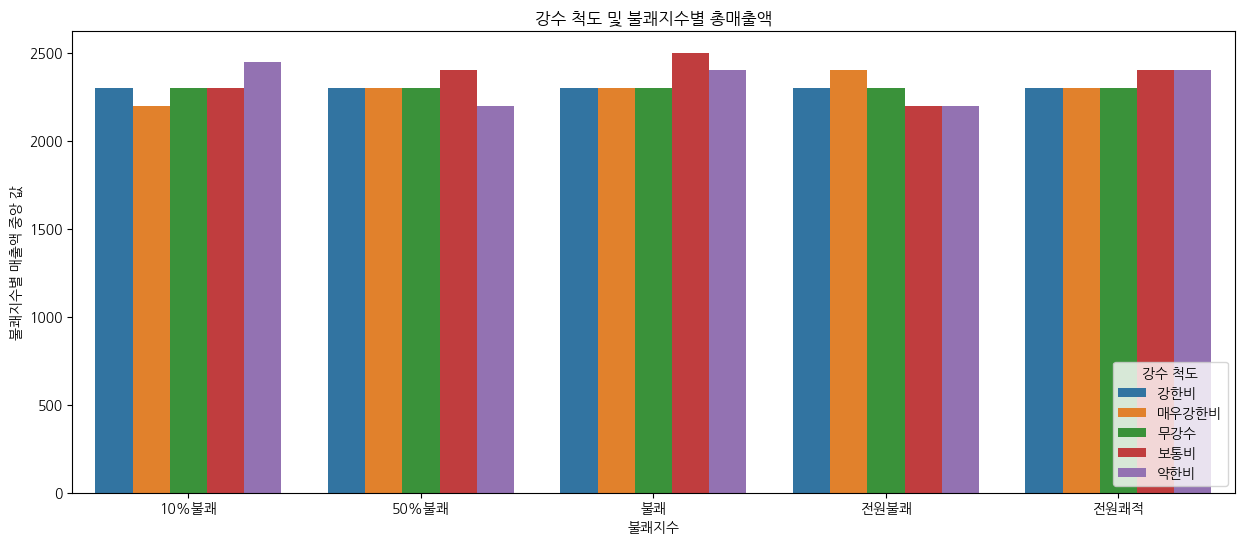

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('불쾌지수별 매출액 중앙 값')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

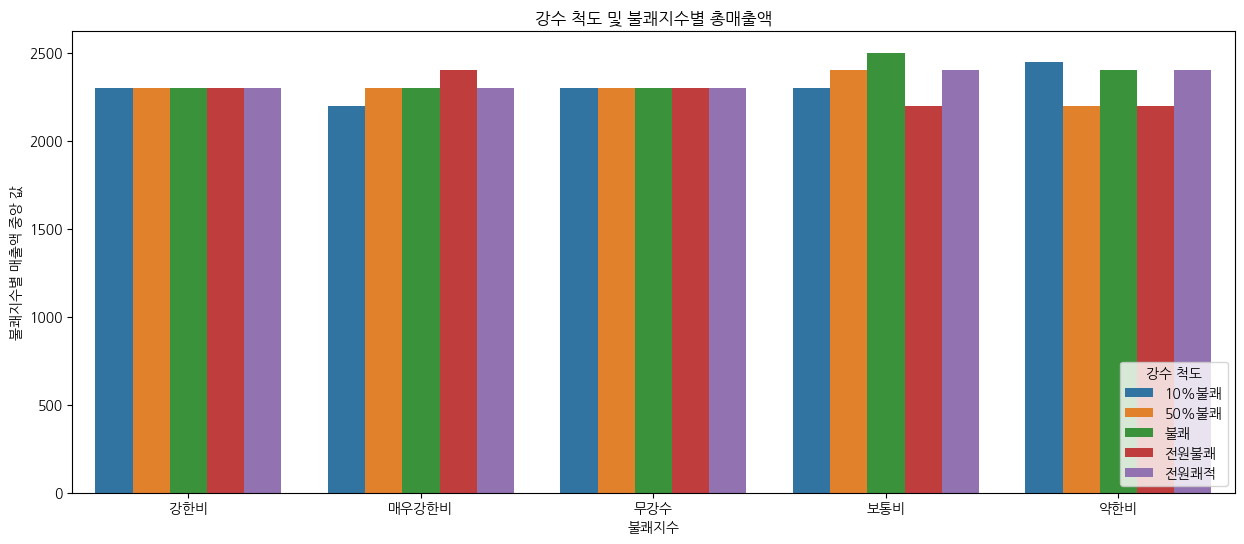

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='classRainfall', y='Price', hue='discomfortIndex')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('불쾌지수별 매출액 중앙 값')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

## log 씌운것

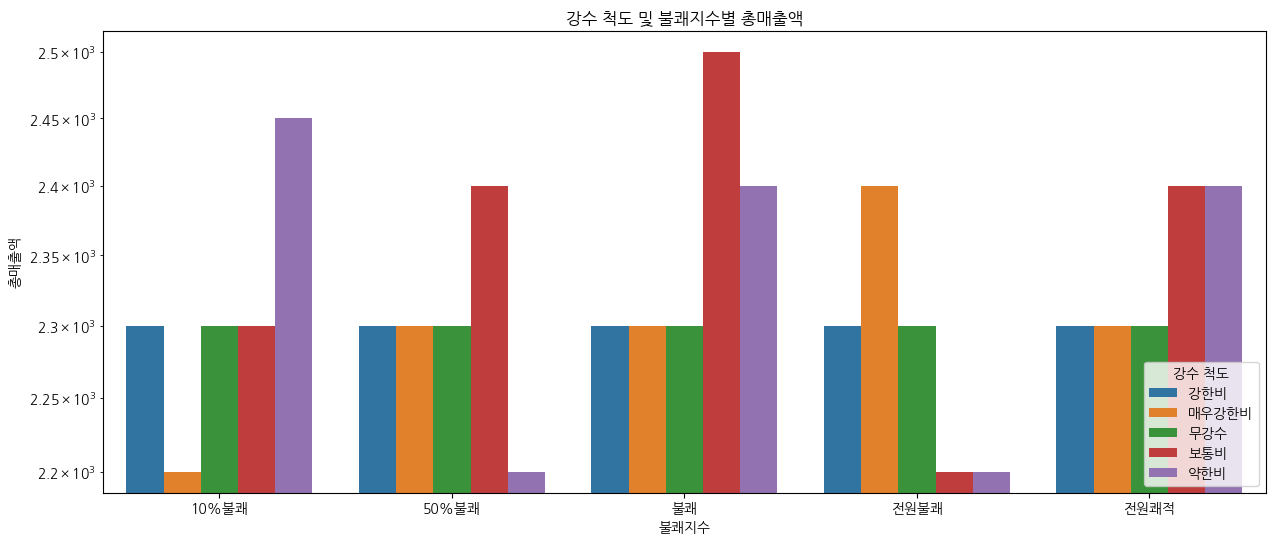

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

plt.yscale('log')# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('총매출액')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

## 상관관계

# 온도와 매출

In [193]:
M_t = df_sales_weather['TempAvg'].max()
m_t = df_sales_weather['TempAvg'].min()
m_t+(M_t-m_t)//4

11.0

In [41]:
df_sales_weather

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex
0,U101066,U101066-Y2021M5D31-P10337,2021-05-31,2021,5,31,0,17:19:59,남성,10대,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,19.9,보통비,전원쾌적
1,U101094,U101094-Y2021M5D31-P10248,2021-05-31,2021,5,31,0,06:19:36,남성,10대,I-8809692952725,L1,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,19.9,보통비,전원쾌적
2,U101077,U101077-Y2021M5D31-P10244,2021-05-31,2021,5,31,0,15:47:12,남성,30대,I-8809453265514,L1,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,19.9,보통비,전원쾌적
3,U101084,U101084-Y2021M5D31-P10233,2021-05-31,2021,5,31,0,20:05:19,남성,30대,I-8809383954557,L1,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,19.9,보통비,전원쾌적
4,U101054,U101054-Y2021M5D31-P10131,2021-05-31,2021,5,31,0,14:06:37,여성,40대,I-8801068403084,L1,간편식사,M2,샌드위치,샌)더블에그파니니,4000,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,U100982-Y2022M2D27-P10035,2022-02-27,2022,2,27,6,19:06:40,남성,40대,I-8801115384014,L6,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,3.7,무강수,전원쾌적
509296,U100989,U100989-Y2022M2D27-P10039,2022-02-27,2022,2,27,6,09:03:30,남성,60대이상,I-8808024031015,L6,음료,M2,아이스,22del)스윗아메리카노230,900,3.7,무강수,전원쾌적
509297,U100977,U100977-Y2022M2D27-P10115,2022-02-27,2022,2,27,6,10:08:15,남성,20대,I-8801094502669,L6,음료,M1,음료,코카)크래프트아메P470ml,2500,3.7,무강수,전원쾌적
509298,U101098,U101098-Y2022M2D27-P10023,2022-02-27,2022,2,27,6,16:55:10,남성,30대,I-8801094523206,L6,음료,M1,음료,코카)조지아맥스캔,1200,3.7,무강수,전원쾌적


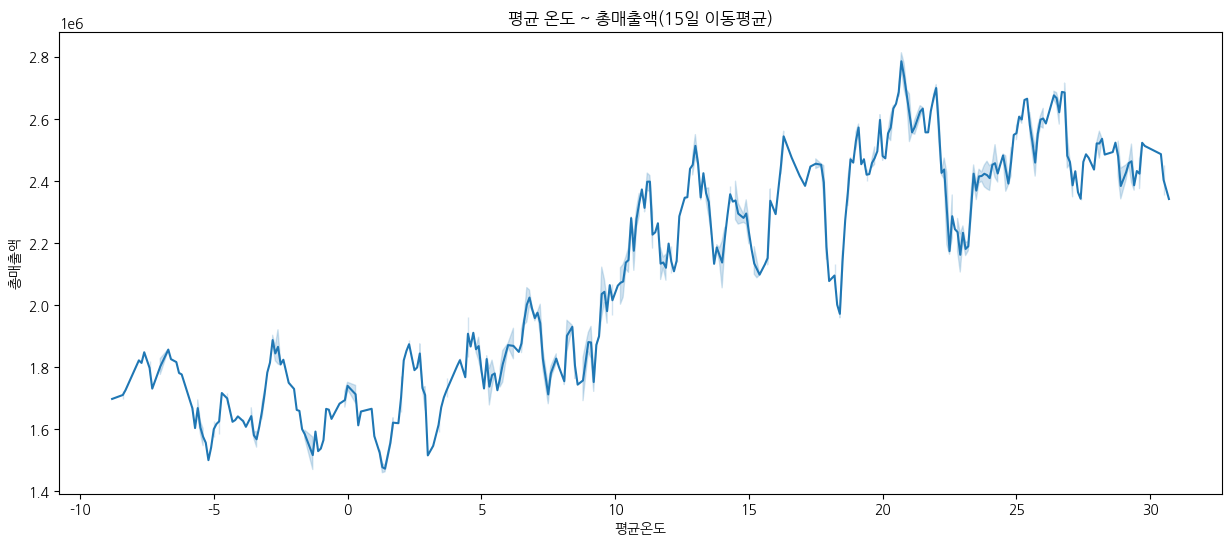

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['SalesDate','TempAvg'])['Price'].agg(['sum']).reset_index(level=0).sort_index().iloc[:,-1].to_frame()
grouped_sales.columns=['Price']
# df_sales_weather.groupby(['TempAvg'])['Price'].sum()
# grouped_sales_date = df_sales_weather.groupby(['TempAvg'])['SalesDate'].size()


# 이동평균 계산 (window size를 조절하여 원하는 기간으로 설정 가능)
window_size = 15
moving_average = grouped_sales.rolling(window=window_size, center=True).mean()

fig, ax = plt.subplots(figsize=(15, 6))
# sns.lineplot(data=grouped_sales.reset_index(), x='TempAvg', y='Price', estimator='mean', ci=None, label='Daily Sales')
sns.lineplot(data=moving_average.reset_index(), x='TempAvg', y='Price')

plt.title('평균 온도 ~ 총매출액({}일 이동평균)'.format(window_size))
plt.xlabel('평균온도')
plt.ylabel('총매출액')
# plt.legend()

plt.show()


In [102]:
grouped_sales.reset_index().corr()

,TempAvg,Price
TempAvg,1.000000,0.472066
Price,0.472066,1.000000


In [99]:
df_sales_weather.groupby(['SalesDate','TempAvg'])['Price'].agg(['sum']).reset_index(level=1).to_csv("평균온도-총매출액.csv")

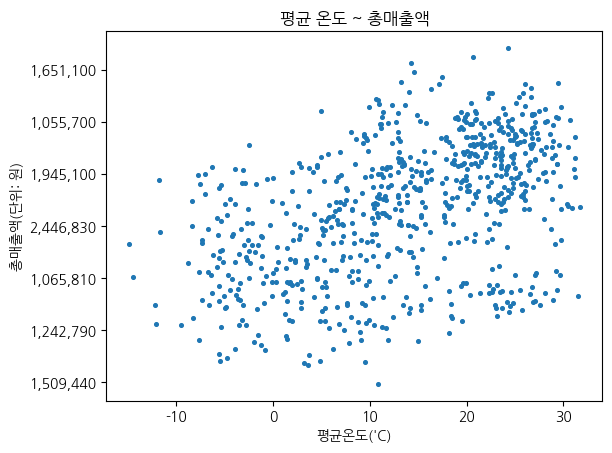

In [103]:
plt.scatter(grouped_sales.reset_index()['TempAvg'], grouped_sales.reset_index()['Price'], s=7)

plt.gca().set_yticklabels(['{:,}'.format(x) for x in grouped_sales.reset_index()['Price']])
 
plt.title('평균 온도 ~ 총매출액')
plt.xlabel('평균온도(\'C)')
plt.ylabel('총매출액(단위: 원)')

# 직선을 그린 예시, (0, 0)과 (0, 100)을 잇는 선 그래프

plt.show()

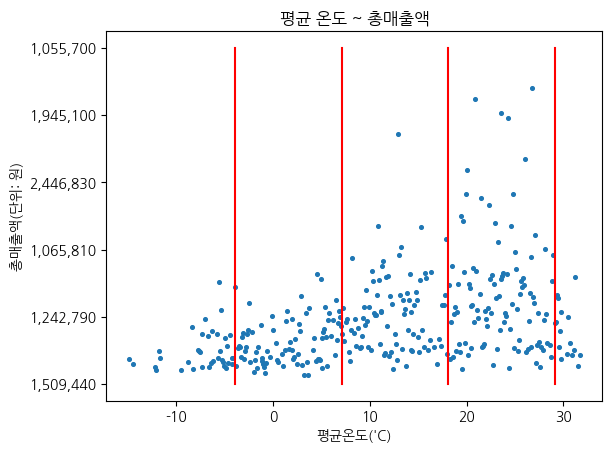

In [203]:
M_t = df_sales_weather['TempAvg'].max()
m_t = df_sales_weather['TempAvg'].min()
m_t+(M_t-m_t)//4


x_m = [m_t+(M_t-m_t)//4, m_t+(M_t-m_t)//4]
x_9 = [m_t+(M_t-m_t)//4*2, m_t+(M_t-m_t)//4*2]
x_20 = [m_t+(M_t-m_t)//4*3, m_t+(M_t-m_t)//4*3]
x_22 = [m_t+(M_t-m_t)//4*4, m_t+(M_t-m_t)//4*4]

# x = [0, ]

y = [0, 25000000]

plt.scatter(grouped_sales.reset_index()['TempAvg'], grouped_sales.reset_index()['Price'], s=7)
plt.plot(x_m, y,c='r')
plt.plot(x_9, y,c='r')
plt.plot(x_20, y,c='r')
plt.plot(x_22, y,c='r')



plt.gca().set_yticklabels(['{:,}'.format(x) for x in grouped_sales.reset_index()['Price']])
 
plt.title('평균 온도 ~ 총매출액')
plt.xlabel('평균온도(\'C)')
plt.ylabel('총매출액(단위: 원)')




# 직선을 그린 예시, (0, 0)과 (0, 100)을 잇는 선 그래프

plt.show()

# 불쾌지수 ~ 매출

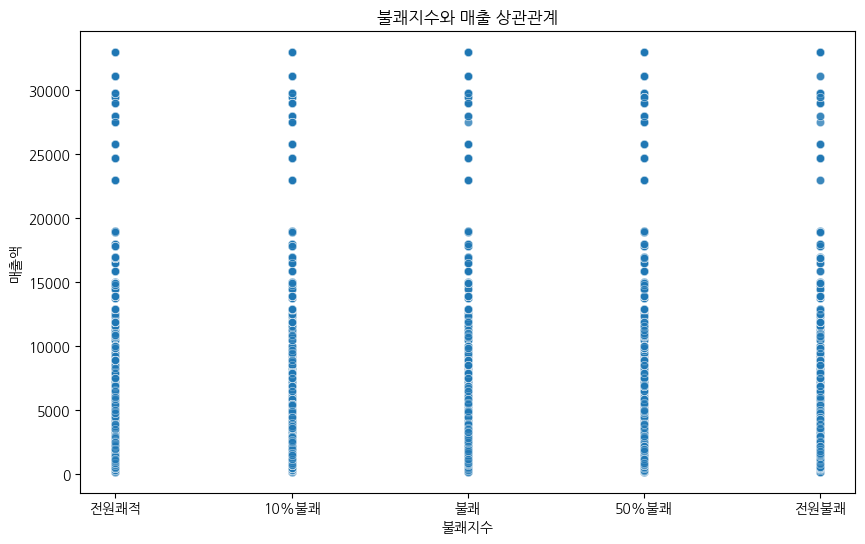

In [5]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')





discomfort_index = df_sales_weather['discomfortIndex']
sales = df_sales_weather['Price']

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=discomfort_index, y=sales, alpha=0.5)

plt.title('불쾌지수와 매출 상관관계')
plt.xlabel('불쾌지수')
plt.ylabel('매출액')

plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

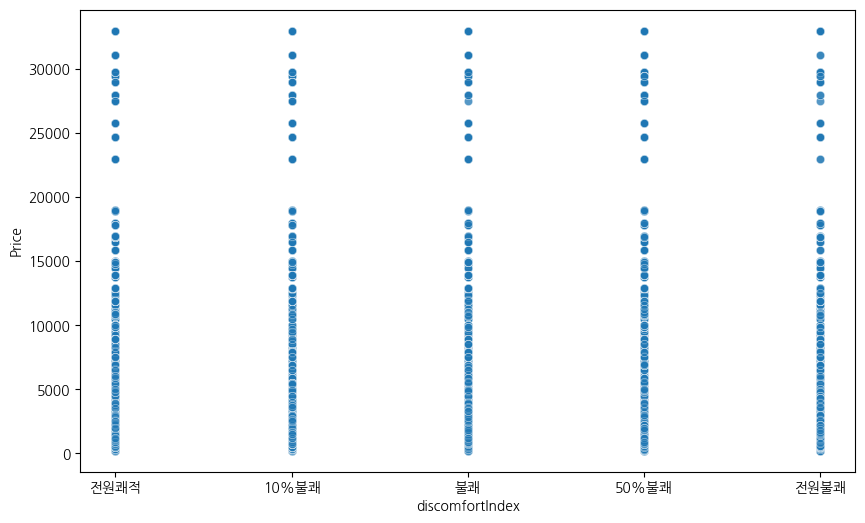

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 불쾌지수와 매출 데이터 추출
discomfort_index = df_sales_weather['discomfortIndex']
sales = df_sales_weather['Price']

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=discomfort_index, y=sales, alpha=0.5)

# 선형 회귀선 추가
sns.regplot(x=discomfort_index, y=sales, scatter=False, color='red')

plt.title('불쾌지수와 매출 상관관계')
plt.xlabel('불쾌지수')
plt.ylabel('매출액')

plt.show()


# 날씨별 판매상품

In [10]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_sales_v3_POS_DATE.csv")
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_sales_v3_POS_DATE.csv")
df_sales_itemsNprice_POS = pd.read_csv("../cvs_data/data_result/users_itemsCategory_POS_v2.csv")
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')

In [11]:
display(df_sales_weather)
display(df_sales_itemsNprice_POS)

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex
0,U101066,U101066-Y2021M5D31-P10337,2021-05-31,2021,5,31,0,17:19:59,남성,10대,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,19.9,보통비,전원쾌적
1,U101094,U101094-Y2021M5D31-P10248,2021-05-31,2021,5,31,0,06:19:36,남성,10대,I-8809692952725,L1,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,19.9,보통비,전원쾌적
2,U101077,U101077-Y2021M5D31-P10244,2021-05-31,2021,5,31,0,15:47:12,남성,30대,I-8809453265514,L1,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,19.9,보통비,전원쾌적
3,U101084,U101084-Y2021M5D31-P10233,2021-05-31,2021,5,31,0,20:05:19,남성,30대,I-8809383954557,L1,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,19.9,보통비,전원쾌적
4,U101054,U101054-Y2021M5D31-P10131,2021-05-31,2021,5,31,0,14:06:37,여성,40대,I-8801068403084,L1,간편식사,M2,샌드위치,샌)더블에그파니니,4000,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,U100982-Y2022M2D27-P10035,2022-02-27,2022,2,27,6,19:06:40,남성,40대,I-8801115384014,L6,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,3.7,무강수,전원쾌적
509296,U100989,U100989-Y2022M2D27-P10039,2022-02-27,2022,2,27,6,09:03:30,남성,60대이상,I-8808024031015,L6,음료,M2,아이스,22del)스윗아메리카노230,900,3.7,무강수,전원쾌적
509297,U100977,U100977-Y2022M2D27-P10115,2022-02-27,2022,2,27,6,10:08:15,남성,20대,I-8801094502669,L6,음료,M1,음료,코카)크래프트아메P470ml,2500,3.7,무강수,전원쾌적
509298,U101098,U101098-Y2022M2D27-P10023,2022-02-27,2022,2,27,6,16:55:10,남성,30대,I-8801094523206,L6,음료,M1,음료,코카)조지아맥스캔,1200,3.7,무강수,전원쾌적


,idUser,idPOS,SalesDate,Price,간편식사_도시락,간편식사_샌드위치,간편식사_주먹밥,과자류_껌/초,과자류_빵/디,과자류_스낵,...,즉석조리_베이커,즉석조리_즉석커,즉석조리_튀김류,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup
0,U100001,U100001-Y2021M1D10-P10008,2021-01-10,1000,0,0,0,0,0,0,...,0,0,0,2021,1,10,6,06:16:24,남성,40대
1,U100001,U100001-Y2021M1D3-P10004,2021-01-03,6500,0,0,0,0,0,0,...,0,0,0,2021,1,3,6,19:08:12,남성,40대
2,U100001,U100001-Y2021M1D7-P10006,2021-01-07,750,0,0,0,0,0,0,...,0,0,0,2021,1,7,3,00:42:18,남성,40대
3,U100277,U100277-Y2022M10D11-P10324,2022-10-11,5300,0,0,0,0,0,0,...,0,0,0,2022,10,11,1,00:09:52,여성,30대
4,U100277,U100277-Y2022M10D11-P10325,2022-10-11,1500,0,0,0,1,0,0,...,0,0,0,2022,10,11,1,13:45:07,여성,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215613,U101098,U101098-Y2022M9D19-P10151,2022-09-19,5200,0,0,0,0,0,1,...,0,0,0,2022,9,19,0,19:03:10,남성,30대
215614,U101098,U101098-Y2022M9D23-P10154,2022-09-23,3700,0,0,0,0,0,1,...,0,0,0,2022,9,23,4,14:13:40,남성,30대
215615,U101098,U101098-Y2022M9D29-P10157,2022-09-29,2900,0,0,1,0,0,1,...,0,0,0,2022,9,29,3,09:24:10,남성,30대
215616,U101098,U101098-Y2022M9D30-P10158,2022-09-30,10300,0,0,0,0,0,0,...,0,0,0,2022,9,30,4,15:47:40,남성,30대


In [7]:
df_sales_2022['ItemId'].value_counts()

I-3415581153019    101
I-8809350885686     98
I-8809453265019     97
I-8801448160286     95
I-8801039207680     94
                  ... 
I-8801068398540     11
I-2201148674124     10
I-2201148669465     10
I-8801068398700      8
I-2201148669816      7
Name: ItemId, Length: 4305, dtype: int64

In [8]:
df_sales['ItemId'].value_counts()

I-8801448160286    172
I-8804751550119    170
I-8801045925790    168
I-8801024945474    168
I-8809350885686    167
                  ... 
I-8801068398540     23
I-2201148670485     21
I-8801068398717     20
I-8801068398700     16
I-2201148669816     15
Name: ItemId, Length: 4305, dtype: int64

## 강수 정도별 가장 많이팔린 물품 확인

In [18]:
import pandas as pd

for rain_class in ['무강수','약한비','보통비','강한비','매우강한비']:
    # 강수량(classRainfall)이 많은 데이터 추출
    high_rainfall_data = df_sales_weather[(df_sales_weather['classRainfall'] == rain_class) ]
                                            # & (df_sales_weather['ItemNameLarge'] == '음료') ]
    
    # 강수량이 많은 상황에서 가장 많이 팔린 (ItemId, ItemName) 상위 20개 확인
    most_sold_items_rainfall = high_rainfall_data.groupby(['ItemId', 'ItemName'])['ItemId'].count().sort_values(ascending=False).head(20)
    
    print("강수량이 {}일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:".format(rain_class))
    display(most_sold_items_rainfall)
    print()


강수량이 무강수일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName       
I-2200000015167  즉석빵)피넛버터쿠키         122
I-8809802263789  김)창녕마늘햄유부          121
I-8801121033463  매일)어메징오트언스위트       121
I-8801007069883  CJ)모닝두부오리엔탈150g    119
I-8809826440074  해성)대추방토500g        119
I-8809142023876  뉴푸드)혼합채소오리엔탈       118
I-8801037057867  티오피)더블랙캔380ml      118
I-8809296889526  팔도)비빔장버터간장         118
I-8801448160286  만인산)매운고추200g       118
I-8801056103569  롯데)트레비금귤P500ml     117
I-8801104671002  빙그레)복숭아아이스티30      117
I-8809638770116  헬로)또요플레요거트150m     117
I-8809456810476  푸드)간편샤인사과컵         117
I-8809505141568  엠즈)폴바셋돌체라떼330m     116
I-8801104304573  빙그레)쥬시쿨청포도450m     116
I-8801121770757  매일)바이오드링킹블루        116
I-8801771024033  주)쿠시마사돈까스마요        116
I-8804751550119  씨즈)한컵우유맛           116
I-2201148663258  도너츠)스트로베리필드        115
I-8801073210363  삼양)불닭볶음면컵          115
Name: ItemId, dtype: int64


강수량이 약한비일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName      
I-8801005961561  샘표)크림파스타소스        25
I-8801448160286  만인산)매운고추200g      24
I-8801005931557  샘표)불닭크림떡볶이양념      22
I-8802456400111  영찬)먹기좋은육포채16g     20
I-8809731109516  신세계)치아바타피자불고      20
I-8801104670944  빙그레)따옴애플망고235m    20
I-8801047858959  동원)리챔200g*3+1입    20
I-8801492380357  하림)미식장인라면담백컵      19
I-8801007441351  CJ)진한참기름110ml     19
I-8801121027141  매일)썬업과일야채그린컵      19
I-8805684004793  MDS)사천왕마라샹궈컵      19
I-8801155734763  동원)시나몬초코우유300m    19
I-8809296884477  팔도)만능비빔장시그니처      19
I-8801068371864  샐)퀴노아바질샐러드        19
I-8801121752296  매일)썬업과일야채레드       18
I-8801448108424  만인산)양파망1kg        18
I-8809802264359  꿉당)고추장수란파스타       18
I-8801121029541  매일)셀렉스프로틴초코       18
I-8801007814759  CJ)고메치즈볼135g      18
I-8801771024156  NCT)HOT돈까스김밥      18
Name: ItemId, dtype: int64


강수량이 보통비일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName      
I-8809562170020  설운)시원얼음1kg        33
I-8801073114937  삼양)삼양비빔면          33
I-8801055702893  네슬레)스윗아메리카원컵      33
I-8804751550119  씨즈)한컵우유맛          31
I-8809487130161  샐)아임닭단백질샐러드       31
I-8809802264342  편스)완전매콤고추면        31
I-8809196614532  도)통새우유산슬덮밥        31
I-8801133007285  머거본)모둠견과플래터       30
I-8809802264021  피)오리지널마르게리피자      30
I-8801155208011  동원)네스퀵초코드링크       30
I-2201148662299  피자)비프스테이크피자       30
I-8801019505225  해태)샤오롱고향만두180g    30
I-8809674970242  해표)들기름볶음김치120g    30
I-8801068087130  삼립)저온숙식빵          30
I-8809140575674  샌)이건가요참치마요        29
I-8807218411725  신라)스위트갈릭파이14입     29
I-8809453264029  김)확실한참치김밥         29
I-8801094132705  코카)환타파인P600ml     29
I-8801056075385  HEYROO미네랄워터P1L    29
I-8801056018979  롯데)레쓰비캔           29
Name: ItemId, dtype: int64


강수량이 강한비일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName       
I-8809383955837  주)모두잘돼지            17
I-8801073310933  삼양)까르보불닭떡볶이        17
I-8809342368616  은하)문어슬라이스120g      17
I-8809061671486  태경)핑크퐁토마토떡볶이       17
I-8809713220338  해태)부라보바닐라콘         16
I-8801223100179  일화)초정탄산수P500ml     16
I-8809713910659  OKF)골드키위500ml      16
I-8801115139836  서울)강릉커피라떼250ml     16
I-8801007101309  CJ)백설중백당1kg        16
I-8801115139584  서울)스페셜티컵카페모카       16
I-8801121772881  매일)저지방우유900ml      15
I-8801094203009  코카)스프라이트캔250ml     15
I-8801382702726  웅진)아침햇살바           15
I-8801056094065  롯데)펩시스트롱P400ml     15
I-8801155740061  동원)얼라이브망고P500ml    15
I-8809451526570  푸드)칼칼한어묵리카노        15
I-8801073210967  삼양)치즈불닭볶음면컵        15
I-8801492380333  하림)미식장인라면얼큰컵       15
I-8809451526693  HEYROO콘스프          14
I-8801019514692  해태)버터링콘            14
Name: ItemId, dtype: int64


강수량이 매우강한비일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName        
I-8809813420041  에이치비)버터롤6입          15
I-8801128503174  팔도)도시락              15
I-8809350885686  서울F&B)하이프로틴초코       15
I-8801062004720  롯데)거꾸로수박바           15
I-8809572420368  씨엔)블루베리100g         15
I-8801056035570  롯데)트로피애플캔355ml      14
I-8801114146170  풀무원)얇은피고기160g       14
I-8801056051921  롯데)칸타타카라멜275ml      14
I-8809286121544  초코)초코비파인트           14
I-8801728106614  HEYROO작은별딸기스낵N      13
I-8801045751245  오뚜기)우노피자불고기         13
I-8809813750070  더본)백종원곱닭짜글이         13
I-8801083451503  농심)프로틴쉐이크미숫         13
I-8801045925790  오뚜기)옛날쌀떡국용기         13
I-8803173410018  HEYROO카라멜러스크N       13
I-8801104671378  빙그레)스페셜티컵카라멜        13
I-4897036692424  코카)몬스터파이프캔355m      13
I-8809722525462  말표)마력에베레스트          12
I-8801056049881  롯데)아이시스8.0P500ml    12
I-8801104306928  빙그레)떡붕어싸만코          12
Name: ItemId, dtype: int64

In [9]:
# import pandas as pd

# # 평균온도 구간 나누기 (예: 0~10, 10~20, ...)
# temperature_bins = [df_sales_weather['TempAvg'].min(),-5, 5, 15, 25, df_sales_weather['TempAvg'].max()]
# temperature_labels = ['~-5', '-5~5','5~15', '15~25', '25~']

# df_sales_weather['TempAvgRange'] = pd.cut(df_sales_weather['TempAvg'], bins=temperature_bins, labels=temperature_labels)

# # # 각 구간별로 가장 많이 팔린 (ItemId, ItemName) 상위 20개 확인
# # most_sold_items_by_temp_range = df_sales_weather.groupby(['TempAvgRange', 'ItemId', 'ItemName'])['ItemId'].count().reset_index()
# # most_sold_items_by_temp_range = most_sold_items_by_temp_range.sort_values(by=['TempAvgRange', 'ItemId'], ascending=[True, False]).groupby('TempAvgRange').head(20)

# # print("평균온도 구간별로 가장 많이 팔린 (ItemId, ItemName) 상위 20개:")
# # print(most_sold_items_by_temp_range)

# for temp_class in temperature_labels:
#     # 강수량(classRainfall)이 많은 데이터 추출
#     high_rainfall_data = df_sales_weather[(df_sales_weather['TempAvgRange'] == temp_class) ]
#                                             # & (df_sales_weather['ItemNameLarge'] == '음료') ]
    
#     # 강수량이 많은 상황에서 가장 많이 팔린 (ItemId, ItemName) 상위 20개 확인
#     most_sold_items_rainfall = high_rainfall_data.groupby(['ItemId', 'ItemName'])['ItemId'].count().sort_values(ascending=False).head(20)
    
#     print("강수량이 {}일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:".format(temp_class))
#     display(most_sold_items_rainfall)
#     print()




## 온도별 많이 팔린 물품 확인

In [20]:
df_temp_cat = pd.DataFrame.from_dict(result, orient='columns', dtype=None, columns=None)
df_temp_cat

,<0°C,0-10°C,10-20°C,20-30°C,30-40°C
가공식,9887,16208,27977,33654,1523
껌/초,4768,7702,13036,15291,719
도시락,1444,2263,3992,4622,212
베이커,563,908,1653,1875,90
빵/디,5853,9211,15390,18270,797
샌드위치,1751,2862,4776,5793,257
스낵,5240,8595,14756,17829,774
식재료,7096,11633,20418,24537,1114
아이스,3407,6406,12986,17158,747
안주류,3727,5950,11629,14691,687


Text(0.5, 1.0, '일평균 기온 구간 별 판매 상품 개수')

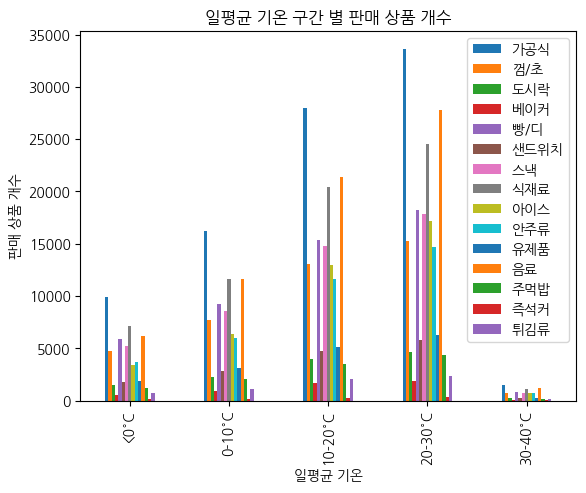

In [25]:
df_temp_cat.T.plot.bar()
plt.xlabel("일평균 기온")
plt.ylabel("판매 상품 개수")
plt.title("일평균 기온 구간 별 판매 상품 개수")

In [15]:
import pandas as pd

# 두 데이터프레임을 병합
merged_df = pd.concat([df_sales_weather, df_sales_itemsNprice_POS], axis=1)


# 온도 구간을 나누기 위한 구간 설정
temp_bins = [-10, 0, 10, 20, 30, 40]  # 임의로 설정한 구간, 필요에 따라 수정 가능
temp_labels = ['<0°C', '0-10°C', '10-20°C', '20-30°C', '30-40°C']

# 온도 구간 추가
merged_df['TempCategory'] = pd.cut(merged_df['TempAvg'], bins=temp_bins, labels=temp_labels)

# 각 온도 구간별로 인기 있는 상위 20개 품목 추출
result = {}
for temp_category in temp_labels:
    temp_df = merged_df[merged_df['TempCategory'] == temp_category]
    popular_items = temp_df['ItemNameMiddle'].value_counts().head(20)
    result[temp_category] = popular_items

# 결과 출력
for temp_category, popular_items in result.items():
    print(f"Temp Category: {temp_category}")
    print(popular_items)
    print('='*50)


Temp Category: <0°C
가공식     9887
식재료     7096
음료      6223
빵/디     5853
스낵      5240
껌/초     4768
안주류     3727
아이스     3407
유제품     1893
샌드위치    1751
도시락     1444
주먹밥     1183
튀김류      700
베이커      563
즉석커      121
Name: ItemNameMiddle, dtype: int64
Temp Category: 0-10°C
가공식     16208
식재료     11633
음료      11606
빵/디      9211
스낵       8595
껌/초      7702
아이스      6406
안주류      5950
유제품      3070
샌드위치     2862
도시락      2263
주먹밥      2093
튀김류      1122
베이커       908
즉석커       169
Name: ItemNameMiddle, dtype: int64
Temp Category: 10-20°C
가공식     27977
음료      21337
식재료     20418
빵/디     15390
스낵      14756
껌/초     13036
아이스     12986
안주류     11629
유제품      5169
샌드위치     4776
도시락      3992
주먹밥      3455
튀김류      2053
베이커      1653
즉석커       286
Name: ItemNameMiddle, dtype: int64
Temp Category: 20-30°C
가공식     33654
음료      27785
식재료     24537
빵/디     18270
스낵      17829
아이스     17158
껌/초     15291
안주류     14691
유제품      6307
샌드위치     5793
도시락      4622
주먹밥      4353
튀김류      2345
베이커      1

In [ ]:
# import pandas as pd

# for rain_class in ['무강수','약한비','보통비','강한비','매우강한비']:
#     # 강수량(classRainfall)이 많은 데이터 추출
#     high_rainfall_data = df_sales_weather[(df_sales_weather['classRainfall'] == rain_class) ]
#                                             # & (df_sales_weather['ItemNameLarge'] == '음료') ]
    
#     # 강수량이 많은 상황에서 가장 많이 팔린 (ItemId, ItemName) 상위 20개 확인
#     most_sold_items_rainfall = high_rainfall_data.groupby(['ItemId', 'ItemName'])['ItemId'].count().sort_values(ascending=False).head(20)
    
#     print("강수량이 {}일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:".format(rain_class))
#     display(most_sold_items_rainfall)
#     print()


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 불쾌지수, 강수 척도(classRainfall) 및 ItemId 데이터 추출
class_rainfall = df_sales_weather['classRainfall']
item_id = df_sales_weather['ItemId']

# 불쾌지수와 강수 척도가 높은 데이터 추출
# high_discomfort_rainfall = df_sales_weather[(discomfort_index == '불쾌') & (class_rainfall == '매우강한비')]

df_sales_weather.groupby('classRainfall').to_frame()
# ['ItemId'].size()



# # 가장 많이 팔린 ItemId 확인
# most_sold_item = df_sales_weather['ItemId'].value_counts()
# most_sold_item

AttributeError: 'DataFrameGroupBy' object has no attribute 'to_frame'